## LinearRegression을 이용해 보스턴 주택 가격 회귀 구현

- CRIM : 지역별 범죄 발생률

- ZN : 25,000평방피트를 초과하는 거주 지역의 비율

- INDUS : 비상업 지역 넓이 비율

- CHAS : 찰스강에 대한 덤위 변수

- NOX : 일산화질소 농도

- RM : 거주할 수 있는 방 개수

- AGE : 1940년 이전에 건축된 소유 주택의 비율

- DIS : 5개 주요 고용센터가지의 가중 거리

- RAD : 고속도로 접근 용이도

- TAX : 10,000 달러당 재산세율

- PTRATIO : 지역의 교사와 학생 수 비율

- B : 지역의 흑인 거주 비율

- LSTAT : 하위 계층의 비율

- MEDV : 본인 소유의 주택 가격

In [81]:
# 데이터 불러오기

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# boston 데이터 세트 로드
boston_df = pd.read_csv('./data/BostonHousing.csv')

print('boston 데이터 세트 크기 : ', boston_df.shape)
boston_df.head()

boston 데이터 세트 크기 :  (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1


In [82]:
# 데이터 확인
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CRIM       506 non-null    float64
 1   ZN         506 non-null    float64
 2   INDUS      506 non-null    float64
 3   CHAS       506 non-null    int64  
 4   NOX        506 non-null    float64
 5   RM         506 non-null    float64
 6   AGE        506 non-null    float64
 7   DIS        506 non-null    float64
 8   RAD        506 non-null    int64  
 9   TAX        506 non-null    int64  
 10  PTRATIO    506 non-null    float64
 11  LSTAT      506 non-null    float64
 12  MEDV       506 non-null    float64
 13  CAT. MEDV  506 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 55.5 KB


In [91]:
boston_df = boston_df.drop(['CAT. MEDV'], axis = 1, inplace = False)

<Axes: xlabel='RM', ylabel='MEDV'>

<Axes: xlabel='ZN', ylabel='MEDV'>

<Axes: xlabel='INDUS', ylabel='MEDV'>

<Axes: xlabel='NOX', ylabel='MEDV'>

<Axes: xlabel='AGE', ylabel='MEDV'>

<Axes: xlabel='PTRATIO', ylabel='MEDV'>

<Axes: xlabel='LSTAT', ylabel='MEDV'>

<Axes: xlabel='RAD', ylabel='MEDV'>

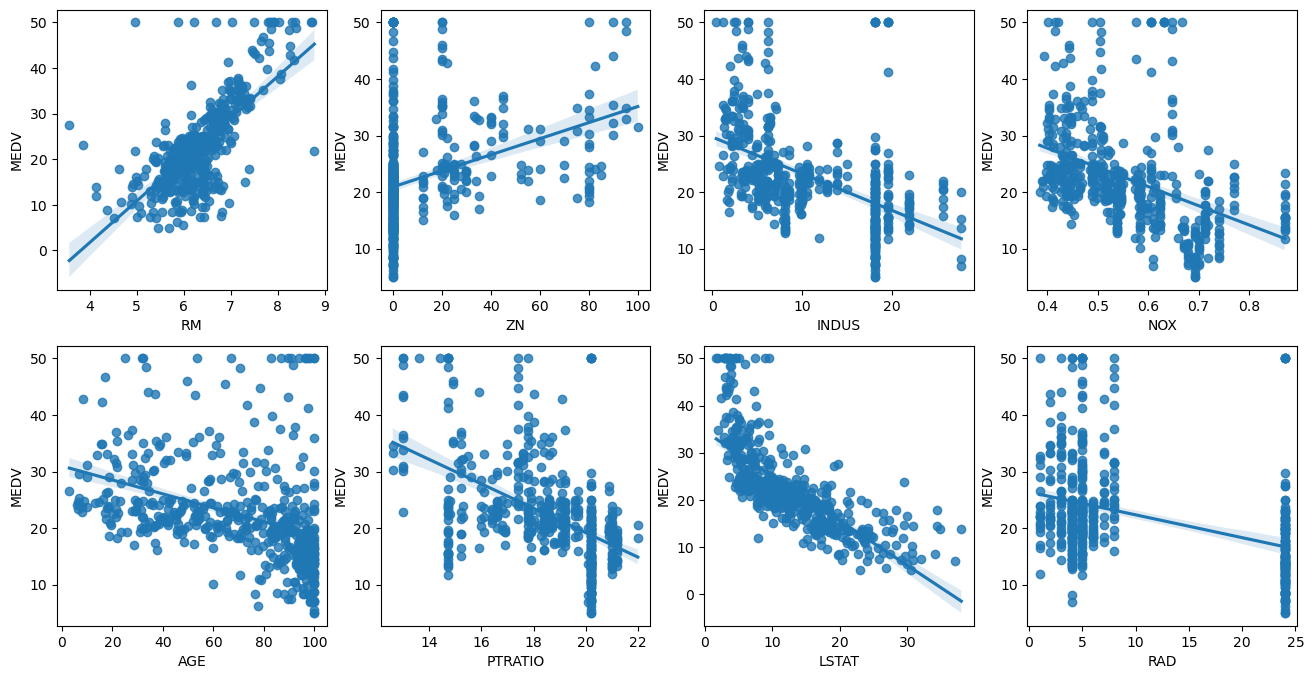

In [92]:
# 각 컬럼이 회귀 결과에 미치는 영향이 어느 정도인지 시각화
# 2개의 행과 4개의 열을 가진 subplots를 이용, axs는 4 * 2개의 ax를 가짐

fig, axs = plt.subplots(figsize = (16, 8), ncols = 4, nrows = 2)
lm_feature = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']

for i, feature in enumerate(lm_feature):
    row = int(i / 4)
    col = i % 4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x = feature, y = 'MEDV', data = boston_df, ax = axs[row][col]);

=> 다른 컬럼보다 RM과 LSTAT의 MEDV 영향도가 가장 두드러지게 나타났다
    
=> RM은 양 방향의 선형성이 가장 크다 -> 방의 크기가 클수록 가격이 증가하는 모습

=> LSTAT는 음의 방향의 선형성이 가장 크다 -> LSTAT이 적을수록 MEDV는 증가

In [93]:
# 데이터 나누기
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = boston_df['MEDV']
X_data = boston_df.drop(['MEDV'], axis = 1, inplace = False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size = 0.3, random_state = 156)

# 선형회귀 OLS로 학습/예측/평가
lr = LinearRegression() # 생성
lr.fit(X_train, y_train) # 학습
y_preds = lr.predict(X_test) # 예측
mse = mean_squared_error(y_test, y_preds) # 평가
rmse = np.sqrt(mse) # 평가

print('MSE : {:.3f}, RMSE : {:.3f}'.format(mse, rmse))
print('variance score : {:.3f}'.format(r2_score(y_test, y_preds)))

LinearRegression()

MSE : 17.631, RMSE : 4.199
variance score : 0.753


In [94]:
# intercept와 coefficients 값 확인
print('절편 값 : ', lr.intercept_)
print('회귀 계수값 : ', np.round(lr.coef_, 1))

절편 값 :  46.16569860896123
회귀 계수값 :  [ -0.2   0.1   0.    3.2 -20.9   3.3   0.   -1.8   0.4  -0.   -0.9  -0.6]


In [95]:
# coef_ 속성은 회귀 계수 값만 가지고 있으므로 이를 피처별 회귀 계수 값으로 다시 매핑
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성, 인덱스 칼럼명에 유희
coeff = pd.Series(data = np.round(lr.coef_, 1), index = X_data.columns)
coeff.sort_values(ascending = False)

RM          3.3
CHAS        3.2
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
CRIM       -0.2
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.8
NOX       -20.9
dtype: float64

In [96]:
# 5개의 폴드 세트에서 cross_val_score()를 이용해 교차 검증으로 MSE, RMSE 확인

from sklearn.model_selection import cross_val_score

y_target = boston_df['MEDV']
X_data = boston_df.drop(['MEDV'], axis = 1, inplace = False)
lr = LinearRegression()

# cross_val_score()로 5 폴드 세트로 MSE극 구한 뒤 이를 기반으로 다시 RMSE를 구함
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring = 'neg_mean_squared_error', cv = 5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring = 'neg_mean_squared_error')로 반환된 값은 모두 음수
print('5 folds의 개별 Negative MSE scores : ', np.round(neg_mse_scores, 2))
print('5 folds의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print('5 folds의 개별 RMSE: {:.3f} '.format(avg_rmse))

5 folds의 개별 Negative MSE scores :  [-12.53 -26.45 -34.34 -77.07 -30.75]
5 folds의 개별 RMSE scores :  [3.54 5.14 5.86 8.78 5.54]
5 folds의 개별 RMSE: 5.773 
